**Description:-** Solving the Credit risk approval prediction problem using 'PyCaret', an AutoML library in Python, used for automating the tedious task of data preprocessing, variable selection and fitting different models using hyperparameter tuning and cross-validation.

In [1]:
!pip install pycaret

In [2]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pycaret
import warnings
warnings.filterwarnings('ignore')
from pycaret.classification import *

In [3]:
# Loading the dataset:
# Note:- We are using the data after being processed by ETL.
# Check the info for the ETL transformation:- https://github.com/caesarmario/etl-credit-card-dataset-using-pentaho
application_data = pd.read_csv("Application_data.csv")

In [4]:
application_data.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


In [5]:
application_data.shape

(25128, 21)

In [6]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

## PyCaret Implementation:

### Building Predict Model:

In [7]:
# Sampling the dataset for training and testing set
df_modelling = application_data.sample(frac=0.9, random_state=123)
df_unseen = application_data.drop(df_modelling.index)

In [8]:
df_modelling.reset_index(inplace = True, drop = True)
df_unseen.reset_index(inplace=True, drop=True)

In [9]:
print('Data for Modelling: ' + str(df_modelling.shape))
print('Unseen data for prediction: ' + str(df_unseen.shape))

Data for Modelling: (22615, 21)
Unseen data for prediction: (2513, 21)


### Setting Up PyCaret:

In [10]:
stp = setup(data = df_modelling, 
            target = 'Status',
            train_size = 0.8,
            categorical_features = ['Applicant_Gender','Owned_Car','Owned_Realty',
                                    'Income_Type','Education_Type','Family_Status',
                                    'Housing_Type','Owned_Mobile_Phone','Owned_Work_Phone',
                                    'Owned_Phone','Owned_Email','Job_Title'], 
            ignore_features = ['Applicant_ID'],
            fix_imbalance = True,
            silent = True,
            session_id=123)

,Description,Value
0,session_id,123
1,Target,Status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(22615, 21)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,14
8,Ordinal Features,False
9,High Cardinality Features,False


### Comparing Models:

In [11]:
# Fitting and comparing models:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9996,1.0000,0.9997,0.9999,0.9998,0.9592,0.9600,1.6730
ada,Ada Boost Classifier,0.9992,0.9988,0.9995,0.9997,0.9996,0.9092,0.9136,1.3670
lightgbm,Light Gradient Boosting Machine,0.9992,0.9998,0.9996,0.9996,0.9996,0.9125,0.9154,0.6510
gbc,Gradient Boosting Classifier,0.9990,0.9997,0.9992,0.9998,0.9995,0.9014,0.9049,5.6200
dt,Decision Tree Classifier,0.9974,0.8791,0.9985,0.9989,0.9987,0.7262,0.7339,0.3970
rf,Random Forest Classifier,0.9964,0.9957,0.9999,0.9965,0.9982,0.3362,0.4052,1.5510
et,Extra Trees Classifier,0.9964,0.9804,0.9998,0.9966,0.9982,0.3661,0.4382,1.5300
knn,K Neighbors Classifier,0.9914,0.7599,0.9937,0.9976,0.9957,0.3338,0.3508,0.4650
ridge,Ridge Classifier,0.9357,0.0000,0.9365,0.9988,0.9666,0.0879,0.1841,0.0920
lda,Linear Discriminant Analysis,0.9355,0.9402,0.9364,0.9988,0.9665,0.0878,0.1839,0.4670


In [12]:
print(best_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### Plotting the Model:

In [13]:
# Evaluate Model Function

In [14]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

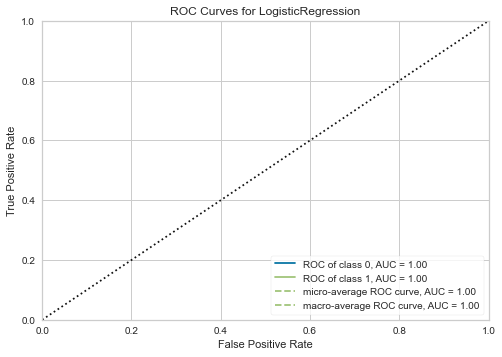

In [15]:
plot_model(best_model)

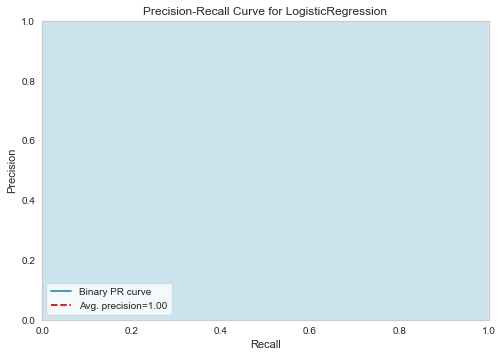

In [16]:
plot_model(best_model, plot = 'pr')

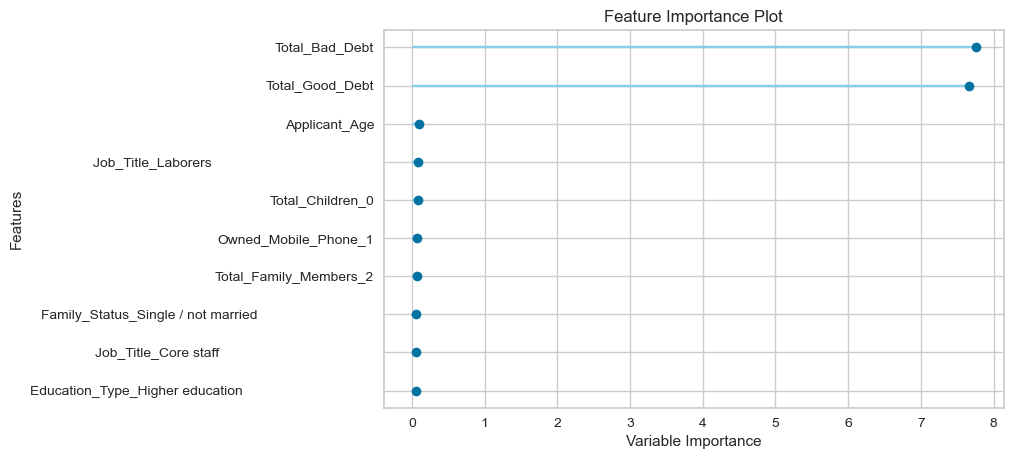

In [17]:
plot_model(best_model, plot = 'feature')

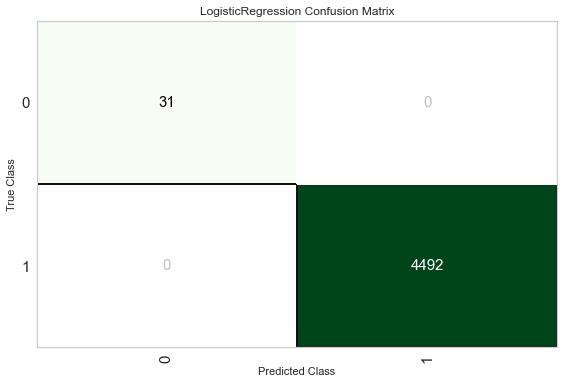

In [18]:
plot_model(best_model, plot = 'confusion_matrix')

### Implementing Best Model:

In [19]:
logistic_reg = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9994,1.0000,0.9994,1.0000,0.9997,0.9471,0.9484
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9983,0.9997,0.9989,0.9994,0.9992,0.8227,0.8241
3,0.9994,1.0000,0.9994,1.0000,0.9997,0.9409,0.9425
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9994,0.9999,0.9994,1.0000,0.9997,0.9409,0.9425
7,0.9994,1.0000,0.9994,1.0000,0.9997,0.9409,0.9425
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [20]:
tune_lr = tune_model(logistic_reg)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9994,1.0000,0.9994,1.0000,0.9997,0.9409,0.9425
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Predict on test sample:

In [21]:
predict_model(tune_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Total_Income,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Applicant_Gender_F,Owned_Car_0,Owned_Realty_0,Total_Children_0,Total_Children_1,...,Total_Family_Members_1,Total_Family_Members_2,Total_Family_Members_3,Total_Family_Members_4,Total_Family_Members_5,Total_Family_Members_6,Total_Family_Members_7,Status,Label,Score
0,180000.0,38.0,4.0,0.0,7.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,1.0
1,450000.0,52.0,2.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
2,135000.0,38.0,4.0,0.0,30.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.0
3,675000.0,38.0,6.0,0.0,18.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0
4,180000.0,39.0,9.0,0.0,30.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4518,67500.0,44.0,2.0,0.0,61.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.0
4519,180000.0,56.0,18.0,0.0,13.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
4520,450000.0,65.0,15.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0
4521,180000.0,38.0,9.0,0.0,37.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1,1.0


### Finalizing the Model:

In [22]:
model_final = finalize_model(tune_lr)
print(model_final)

LogisticRegression(C=6.718000000000001, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [23]:
predictions = predict_model(model_final, data=df_unseen)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,...,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Label,Score
0,5008826,F,1,0,0,130500,Working ...,Incomplete higher ...,Married ...,House / apartment ...,...,0,Accountants ...,2,30,4,7,23,1,1,1.0
1,5008832,F,0,1,0,157500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,2,28,5,2,33,1,1,1.0
2,5008841,M,0,1,1,405000,Commercial associate ...,Higher education ...,Married ...,House / apartment ...,...,0,Managers ...,3,33,6,0,5,1,1,1.0
3,5008858,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,4,44,9,0,11,1,1,1.0
4,5008862,F,1,1,2,135000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,...,0,Laborers ...,4,44,9,0,3,1,1,1.0


### Saving the model:

In [24]:
save_model(tune_lr, 'Pycaret_CreditRiskModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Applicant_Gender',
                                                             'Owned_Car',
                                                             'Owned_Realty',
                                                             'Income_Type',
                                                             'Education_Type',
                                                             'Family_Status',
                                                             'Housing_Type',
                                                             'Owned_Mobile_Phone',
                                                             'Owned_Work_Phone',
                                                             'Owned_Phone',
                                                             'Owned_Email',
                                                             'Job_Title'],
                

In [25]:
predictions.to_csv("Predicted_Data.csv", index = False)